In [1]:
import pandas as pd
import numpy as np


# Problem Statement: Data Wrangling on Real Estate Market
Dataset: "RealEstate_Prices.csv"
Description: The dataset contains information about housing prices in a specific real estate
market. It includes various attributes such as property characteristics, location, sale prices,
and other relevant features. The goal is to perform data wrangling to gain insights into the
factors influencing housing prices and prepare the dataset for further analysis or modeling.
Tasks to Perform:

1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces,
special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g.,
imputation or removal).
3. Perform data merging if additional datasets with relevant information are available
(e.g., neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time period,
property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or
label encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as average
sale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis
or modeling process

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [17]:
# dropping the society column
df = df.drop(columns=['society'])

In [18]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [19]:
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [20]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [21]:
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['size'] = df['size'].fillna(df['size'].mode()[0])

In [22]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [23]:
# Filter and subset the data 

In [40]:
# # df_ready_to_move_property = df[(df['area_type'] == 'Super built-up Area') & (df['availability'] == 'Ready To Move')]
# # # Filter data based on specific criteria
# df_filtered = df[(df['area_type'] == 'Super built-up Area') & (df['availability'] == 'Ready To Move')]


In [47]:
df_filter = df[(df['availability'] == 'Ready To Move') & (df['size'].str.contains('2 BHK'))]

In [48]:
df_filter


,area_type,availability,location,size,total_sqft,bath,balcony,price
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.0,38.00
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.00
13,Built-up Area,Ready To Move,Gottigere,2 BHK,1100,2.0,2.0,40.00
15,Super built-up Area,Ready To Move,Mysore Road,2 BHK,1175,2.0,2.0,73.50
...,...,...,...,...,...,...,...,...
13302,Super built-up Area,Ready To Move,Annaiah Reddy Layout,2 BHK,1075,2.0,2.0,48.00
13304,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1187,2.0,2.0,40.14
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,1050,2.0,2.0,52.71
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,1262,2.0,2.0,47.00


In [45]:
print(df['area_type'].unique())
print(df['availability'].unique())


['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']


In [49]:
# avg sales by location

In [50]:
avg_sales_by_location = df.groupby('location')['price'].mean().reset_index()
avg_sales_by_location.columns = ['Location', 'price']

In [51]:
avg_sales_by_location

,Location,price
0,1 Annasandrapalya,150.00
1,1 Giri Nagar,360.00
2,1 Immadihalli,150.00
3,1 Ramamurthy Nagar,170.00
4,12th cross srinivas nagar banshankari 3rd stage,200.00
...,...,...
1289,t.c palya,160.00
1290,tc.palya,60.75
1291,vinayakanagar,200.00
1292,"white field,kadugodi",275.00


In [52]:
# encoding 
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
df['encoded_area_type'] = le.fit_transform(df['area_type'])

In [55]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,encoded_area_type
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,3
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,3
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00,3
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,3


In [56]:
df['encoded_area_type'].value_counts()

encoded_area_type
3    8790
0    2418
2    2025
1      87
Name: count, dtype: int64

In [57]:
# removing outiers
import matplotlib.pyplot as plt

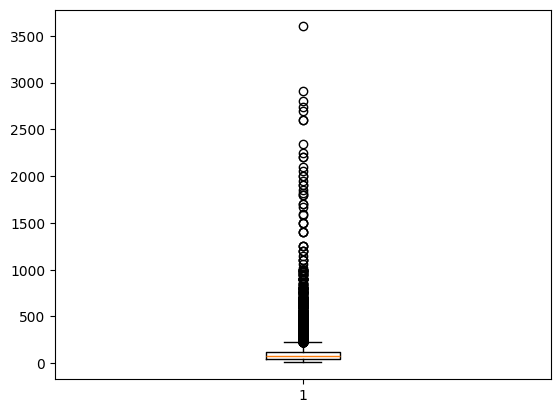

In [58]:
plt.boxplot('price' , data=f

In [59]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)


In [60]:
print(Q1)
print(Q3)

50.0
120.0


In [61]:
IQR = Q3- Q1 

In [64]:
low =Q3 + 1.5*IQR
high = Q1 - 1.5*IQR
print(low)
print(high)

225.0
-55.0


In [62]:
print(IQR)

70.0


In [67]:
df= df[(df['price']>=low) & (df['price']<=high)]

In [69]:
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


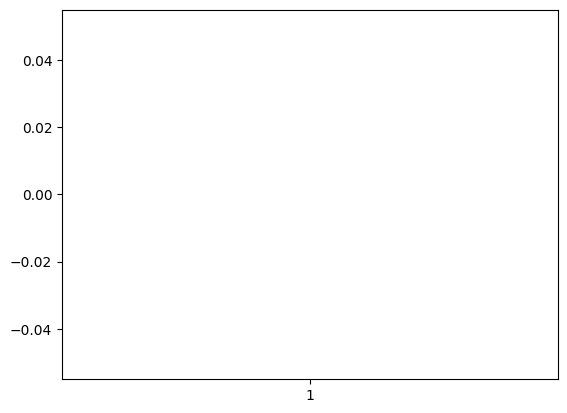

In [70]:
plt.boxplot(x='price' , data=df)
plt.show()

In [71]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,encoded_area_type
